In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("supermarket_sales.csv")

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
df.shape

(1000, 17)

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
sales_by_product=df.groupby("Product line")["Total"].sum()

In [8]:
sales_by_product

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [11]:
sales_by_city = df.groupby('City')['Total'].sum()

In [12]:
sales_by_city

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

In [13]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Visualisation 


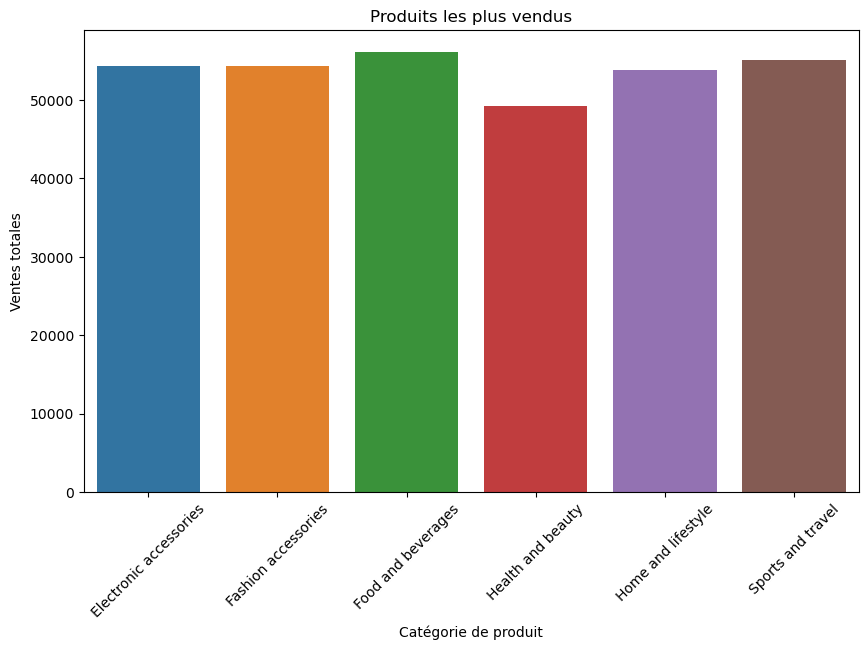

In [35]:
# Ventes totales par produit
sales_by_product = df.groupby('Product line')['Total'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values)
plt.title('Produits les plus vendus')
plt.xlabel('Catégorie de produit')
plt.ylabel('Ventes totales')
plt.xticks(rotation=45)
plt.show()


Les produits "Food and Beverages" sont les plus vendus, suivis par les autres catégories, qui se montrent relativement égales en termes de ventes. En revanche, la catégorie "Health and Beauty" a le volume de ventes le plus faible.

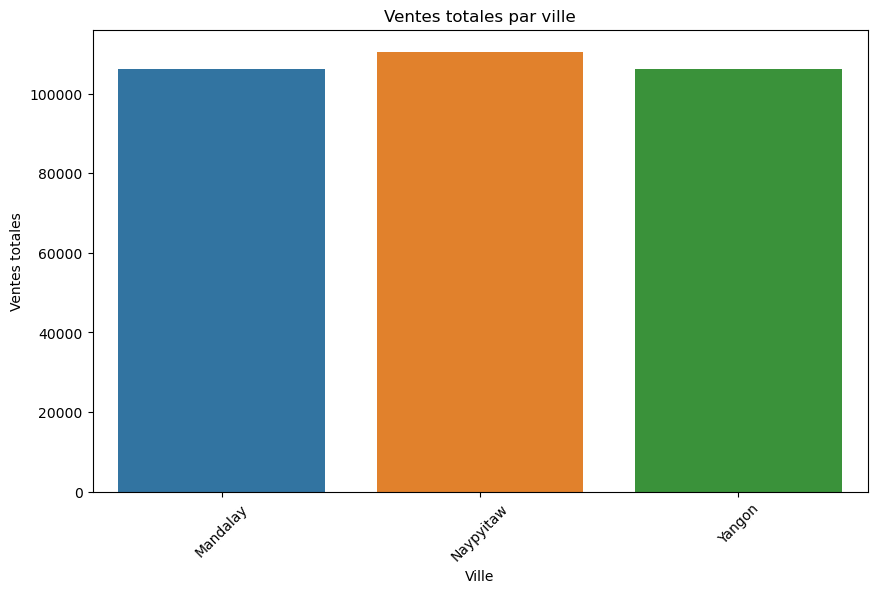

In [36]:
# Ventes totales par ville
sales_by_city = df.groupby('City')['Total'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values)
plt.title('Ventes totales par ville')
plt.xlabel('Ville')
plt.ylabel('Ventes totales')
plt.xticks(rotation=45)
plt.show()


La ville de Naypyitaw génère le plus grand nombre de ventes, indiquant un marché potentiellement très rentable.

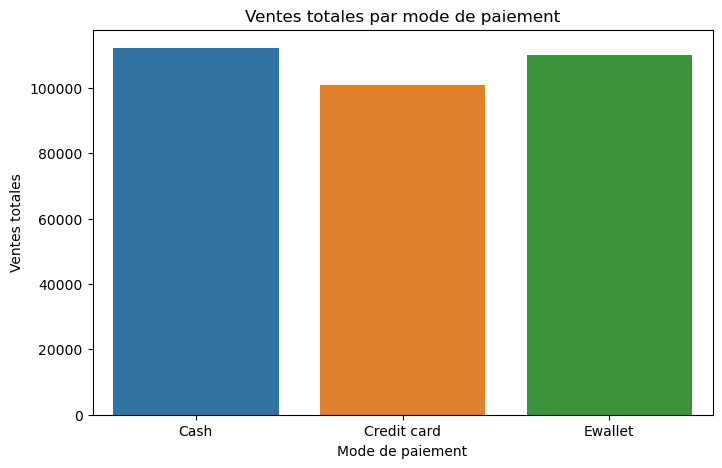

In [37]:
# Ventes par mode de paiement
sales_by_payment = df.groupby('Payment')['Total'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_payment.index, y=sales_by_payment.values)
plt.title('Ventes totales par mode de paiement')
plt.xlabel('Mode de paiement')
plt.ylabel('Ventes totales')
plt.show()


Les méthodes de paiement "Cash" et "Ewallet" sont plus couramment utilisées que les cartes de crédit.

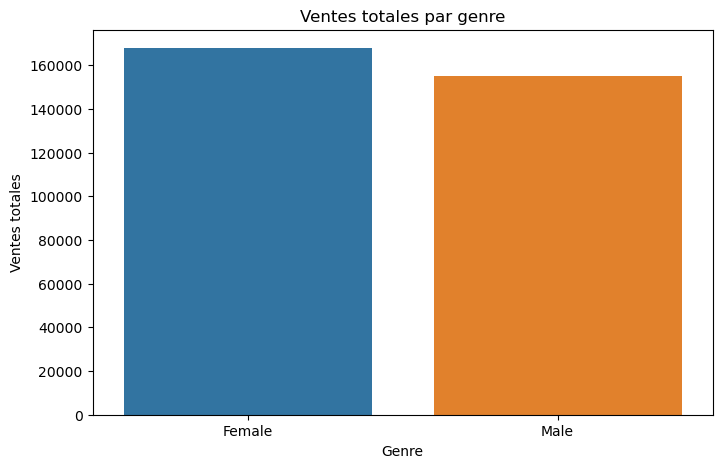

In [38]:
# Ventes par genre
sales_by_gender = df.groupby('Gender')['Total'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values)
plt.title('Ventes totales par genre')
plt.xlabel('Genre')
plt.ylabel('Ventes totales')
plt.show()


Les femmes achètent plus que les hommes, ce qui suggère que le marketing pourrait être mieux ciblé pour ce groupe.


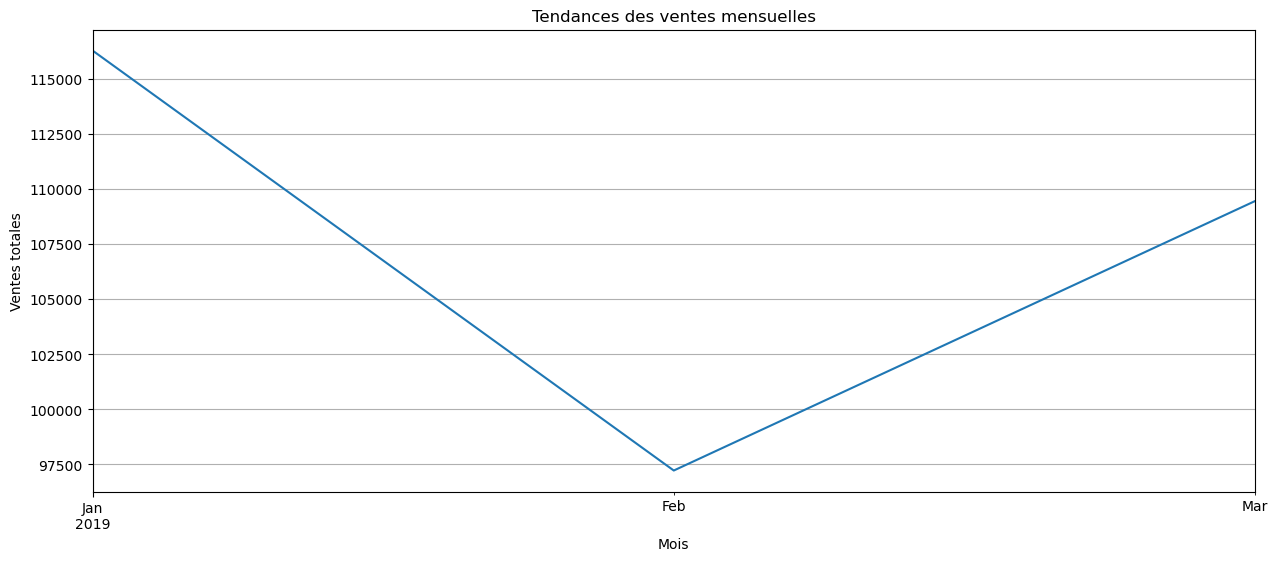

In [39]:
# Ventes mensuelles
df['Month'] = df['Date'].dt.to_period('M')
sales_by_month = df.groupby('Month')['Total'].sum()

plt.figure(figsize=(15,6))
sales_by_month.plot()
plt.title('Tendances des ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Ventes totales')
plt.grid(True)
plt.show()


Les ventes sont les plus élevées au début de janvier, dépassant 115,000. Cependant, elles diminuent en février à un minimum de 97,500, avant de remonter en mars jusqu'à 110,000.

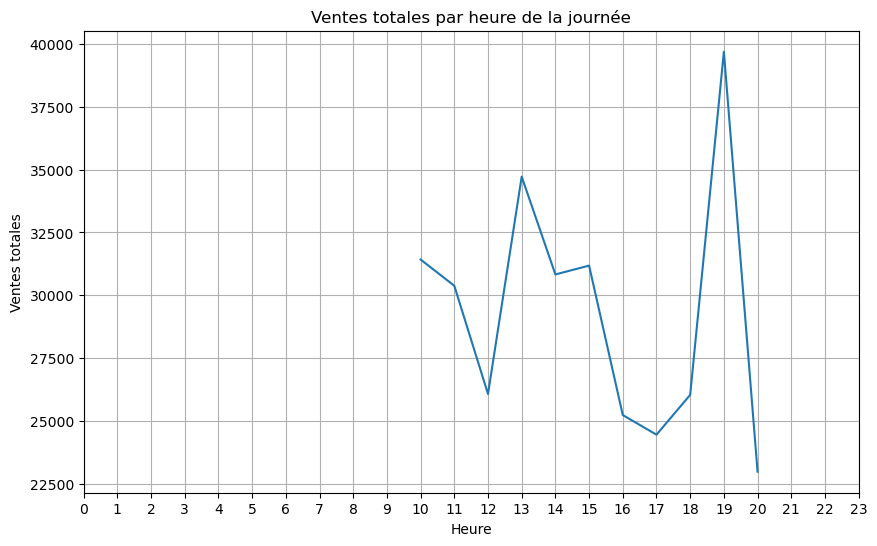

In [40]:
# Ajouter une colonne pour l'heure
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)

# Ventes par heure
sales_by_hour = df.groupby('Hour')['Total'].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values)
plt.title('Ventes totales par heure de la journée')
plt.xlabel('Heure')
plt.ylabel('Ventes totales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


Les heures avec les ventes les plus élevées sont 13h et 19h, tandis que les ventes diminuent considérablement à 20h et entre 13h et 18h. Cela pourrait suggérer des opportunités pour des promotions à certaines heures.

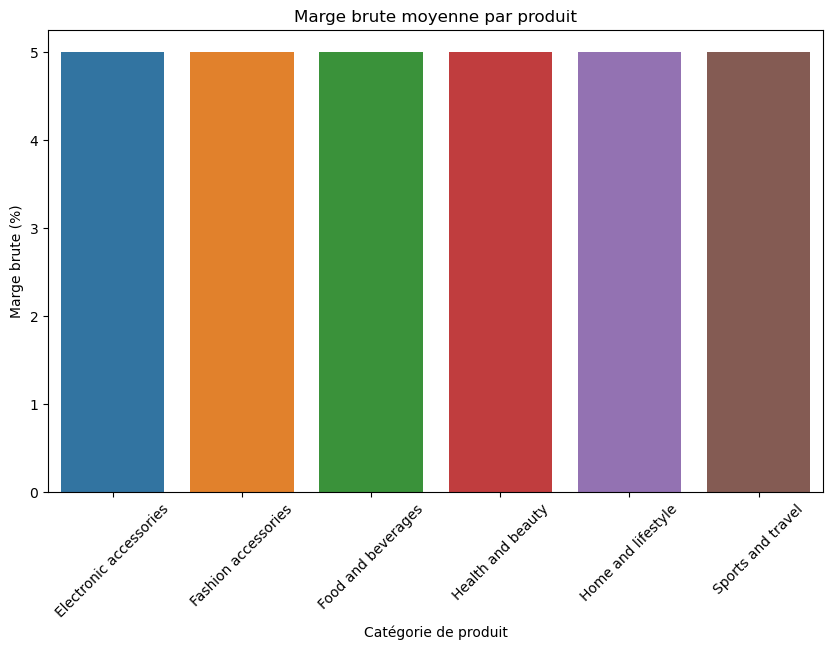

In [41]:
# Marge brute par produit
df['Gross Margin'] = df['gross income'] / df['cogs'] * 100
margin_by_product = df.groupby('Product line')['Gross Margin'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=margin_by_product.index, y=margin_by_product.values)
plt.title('Marge brute moyenne par produit')
plt.xlabel('Catégorie de produit')
plt.ylabel('Marge brute (%)')
plt.xticks(rotation=45)
plt.show()


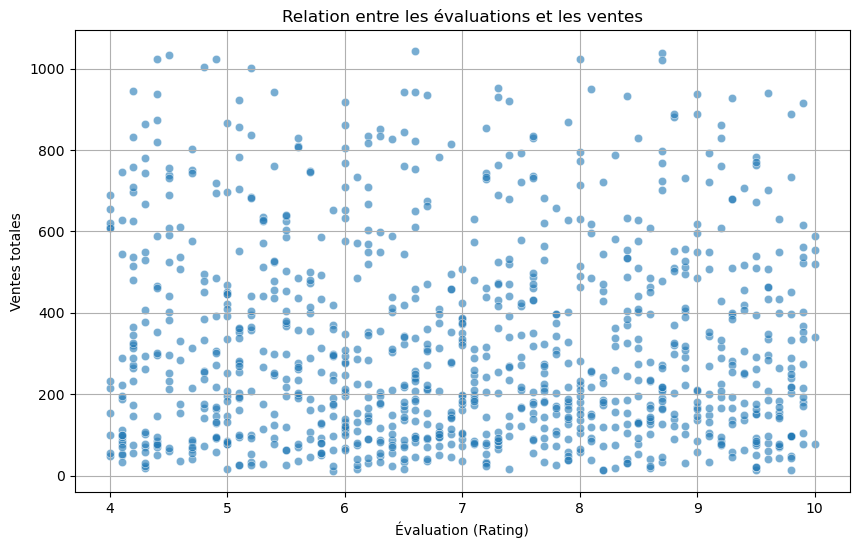

In [42]:
# Graphique de la relation entre les ventes et les évaluations
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y='Total', alpha=0.6)
plt.title('Relation entre les évaluations et les ventes')
plt.xlabel('Évaluation (Rating)')
plt.ylabel('Ventes totales')
plt.grid(True)
plt.show()


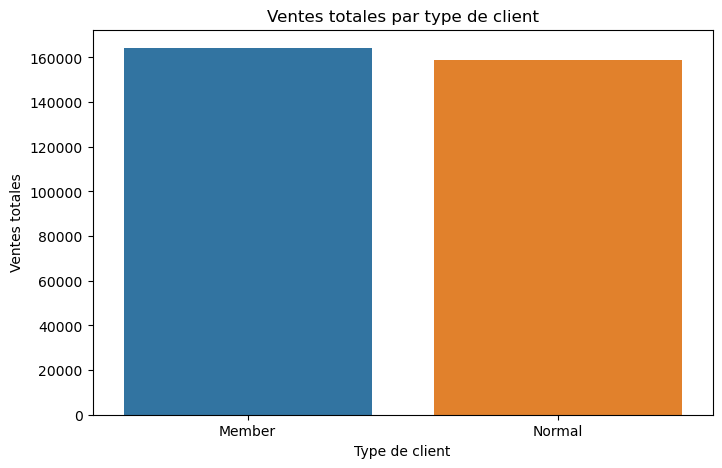

In [44]:
# Ventes par type de client
sales_by_customer_type = df.groupby('Customer type')['Total'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_customer_type.index, y=sales_by_customer_type.values)
plt.title('Ventes totales par type de client')
plt.xlabel('Type de client')
plt.ylabel('Ventes totales')
plt.show()


Les membres dépensent plus que les clients normaux, ce qui souligne l'importance des programmes de fidélité pour encourager les ventes.

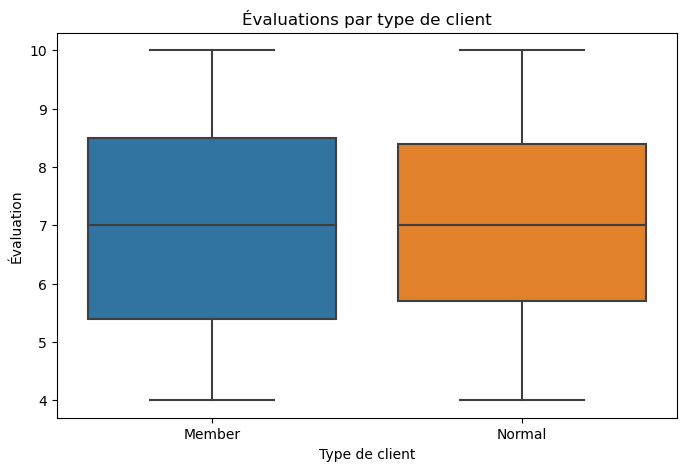

In [45]:
# Évaluations par type de client
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer type', y='Rating', data=df)
plt.title('Évaluations par type de client')
plt.xlabel('Type de client')
plt.ylabel('Évaluation')
plt.show()


<Figure size 1500x600 with 0 Axes>

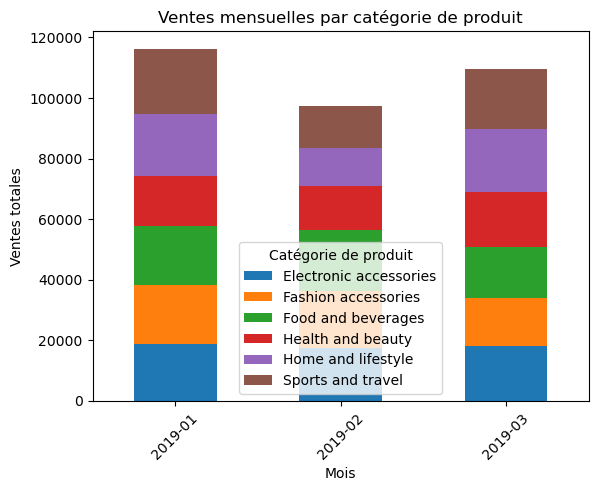

In [46]:
# Graphique pour les ventes par mois et produit
sales_by_month_product = df.groupby(['Month', 'Product line'])['Total'].sum().unstack()

plt.figure(figsize=(15,6))
sales_by_month_product.plot(kind='bar', stacked=True)
plt.title('Ventes mensuelles par catégorie de produit')
plt.xlabel('Mois')
plt.ylabel('Ventes totales')
plt.legend(title='Catégorie de produit')
plt.xticks(rotation=45)
plt.show()


En janvier et mars, les produits "Home and Lifestyle", "Sports and Travel", et "Health and Beauty" sont mieux vendus par rapport à février. Cela suggère des variations saisonnières dans les préférences des consommateurs.